In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio

In [4]:
import os
import sys

In [4]:
Crema = "./AudioWAV/"

In [5]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

In [6]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,./AudioWAV/1022_ITS_ANG_XX.wav
1,angry,./AudioWAV/1037_ITS_ANG_XX.wav
2,neutral,./AudioWAV/1060_ITS_NEU_XX.wav
3,neutral,./AudioWAV/1075_ITS_NEU_XX.wav
4,disgust,./AudioWAV/1073_IOM_DIS_XX.wav


In [7]:
Crema_df['Emotions'].unique()

array(['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy'],
      dtype=object)

In [8]:
Crema_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  7442 non-null   object
 1   Path      7442 non-null   object
dtypes: object(2)
memory usage: 116.4+ KB


In [9]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Звуковая волна {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Спектрограмма {} emotion'.format(e), size=15)  
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

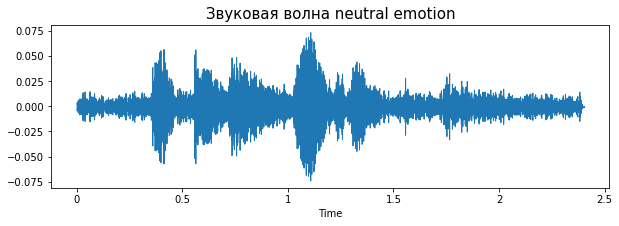

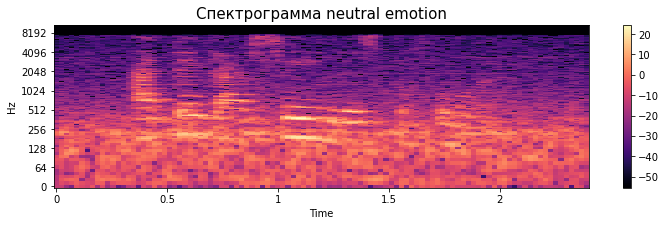

In [10]:
emotion='fear'
path = Crema_df.Path[2]
Audio(path)
emotion = Crema_df.Emotions[2]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

In [139]:
# Создание вектора описательной статистики каждой записи
def extract_features(data, sample_rate):
    result = np.array([])
    # MelSpectogram
    mel = librosa.feature.melspectrogram(y=data, sr=sample_rate).T
    a = mel.shape[0]
    b = mel.shape[1]
    mel.resize(1,a*b)
    result = np.hstack((result, mel[0])) # stacking horizontally
    
    return result

In [140]:
def get_features(path):
    # duration - длительность аудио, offset - смещение.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # Без изменений
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)
    
    return result

In [141]:
X, Y = [], []
for path, emotion in zip(Crema_df.Path, Crema_df.Emotions):
    feature = get_features(path)
    X.append(feature)
    Y.append(emotion)

In [142]:
len(X), len(Y)

(7442, 7442)

In [143]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,13815,13816,13817,13818,13819,13820,13821,13822,13823,labels
0,0.042846,0.124823,0.275732,0.195043,0.042775,0.013419,0.020612,0.047416,0.118046,0.220901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
1,0.023672,0.047448,0.058399,0.105250,0.091233,0.105898,0.053098,0.090422,0.148984,0.106467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
2,0.001609,0.004600,0.027379,0.027074,0.002579,0.008287,0.042709,0.038335,0.067240,0.080544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
3,0.016473,0.029656,0.020612,0.030338,0.049569,0.113153,0.083516,0.058937,0.132452,0.085231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
4,0.019109,0.129222,0.151689,0.142457,0.125509,0.113003,0.157875,0.058317,0.026644,0.027917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust


In [144]:
Features.replace(np.nan, 0)

,0,1,2,3,4,5,6,7,8,9,...,13815,13816,13817,13818,13819,13820,13821,13822,13823,labels
0,0.042846,0.124823,0.275732,0.195043,0.042775,0.013419,0.020612,0.047416,0.118046,0.220901,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,angry
1,0.023672,0.047448,0.058399,0.105250,0.091233,0.105898,0.053098,0.090422,0.148984,0.106467,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,angry
2,0.001609,0.004600,0.027379,0.027074,0.002579,0.008287,0.042709,0.038335,0.067240,0.080544,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,neutral
3,0.016473,0.029656,0.020612,0.030338,0.049569,0.113153,0.083516,0.058937,0.132452,0.085231,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,neutral
4,0.019109,0.129222,0.151689,0.142457,0.125509,0.113003,0.157875,0.058317,0.026644,0.027917,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,0.031157,0.026871,0.010916,0.005925,0.079781,0.136954,0.063661,0.073214,0.059806,0.013275,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,angry
7438,0.207839,0.063924,0.004913,0.025771,0.062492,0.048038,0.053210,0.129690,0.092489,0.088458,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,angry
7439,0.087382,0.040754,0.096612,0.096922,0.083995,0.071978,0.133118,0.196258,0.135280,0.168491,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,angry
7440,0.091006,0.203429,0.109613,0.118641,0.453333,0.524382,0.198560,0.045588,0.024922,0.045086,...,1.488868e-16,1.332499e-16,9.280025e-17,9.670260e-17,1.436783e-16,9.077784e-17,9.897912e-17,1.739961e-11,2.173631e-09,angry


In [145]:
Features.to_csv('features.csv', index=False)

In [33]:
Features = pd.read_csv('features.csv')

In [34]:
K = Features.replace(np.nan, 0)

In [35]:
K.head()

,0,1,2,3,4,5,6,7,8,9,...,13815,13816,13817,13818,13819,13820,13821,13822,13823,labels
0,0.042846,0.124823,0.275732,0.195043,0.042775,0.013419,0.020612,0.047416,0.118046,0.220901,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
1,0.023672,0.047448,0.058399,0.105250,0.091233,0.105898,0.053098,0.090422,0.148984,0.106467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
2,0.001609,0.004600,0.027379,0.027074,0.002579,0.008287,0.042709,0.038335,0.067240,0.080544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
3,0.016473,0.029656,0.020612,0.030338,0.049569,0.113153,0.083516,0.058937,0.132452,0.085231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
4,0.019109,0.129222,0.151689,0.142457,0.125509,0.113003,0.157875,0.058317,0.026644,0.027917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disgust


In [27]:
Features['labels'].unique()

array(['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy'],
      dtype=object)

In [44]:
X = K.iloc[: ,:-1].values
Y = K['labels'].values

In [45]:
print(X)

[[4.28458080e-02 1.24822699e-01 2.75732189e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.36718692e-02 4.74479832e-02 5.83992042e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.60943426e-03 4.60023992e-03 2.73785889e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.73817205e-02 4.07535061e-02 9.66123641e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.10064057e-02 2.03429252e-01 1.09613083e-01 ... 9.89791218e-17
  1.73996130e-11 2.17363150e-09]
 [1.68605875e-02 1.47807542e-02 2.87023596e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [46]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [47]:
print(Y)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5581, 13824), (5581, 6), (1861, 13824), (1861, 6))

In [49]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5581, 13824), (5581, 6), (1861, 13824), (1861, 6))

In [51]:
print(x_train.shape)

(5581, 13824)


In [56]:
from tensorflow import keras
import tensorflow as tensorflow

In [58]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1, 13824)),
    keras.layers.Dense(512, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(16, activation=tensorflow.nn.relu),
    keras.layers.Dense(6, activation=tensorflow.nn.softmax)
])

In [60]:
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Минимизируемая функция потерь
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # Список метрик для мониторинга
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [61]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


ValueError: in user code:

    File "/Users/germanzelenin/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/germanzelenin/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/germanzelenin/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/germanzelenin/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/Users/germanzelenin/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/germanzelenin/opt/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 1, 13824), found shape=(None, 13824)


In [49]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,angry,angry
1,angry,angry
2,neutral,neutral
3,fear,neutral
4,happy,happy
5,angry,angry
6,fear,happy
7,fear,disgust
8,sad,neutral
9,angry,angry


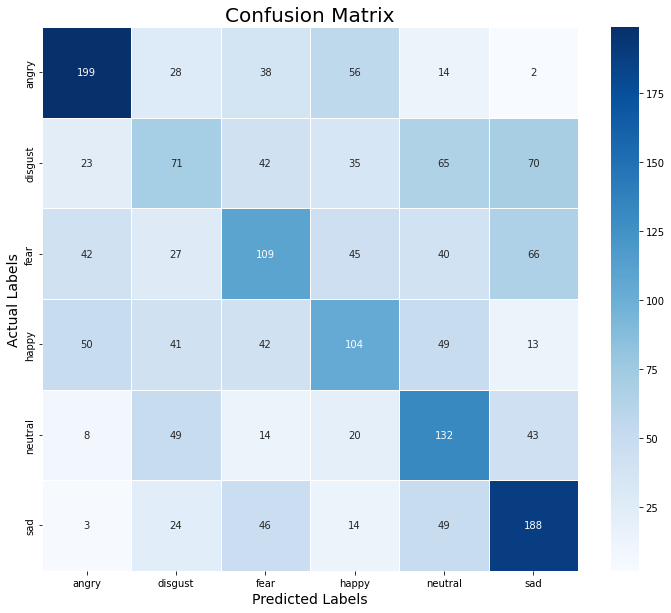

In [50]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.61      0.59      0.60       337
     disgust       0.30      0.23      0.26       306
        fear       0.37      0.33      0.35       329
       happy       0.38      0.35      0.36       299
     neutral       0.38      0.50      0.43       266
         sad       0.49      0.58      0.53       324

    accuracy                           0.43      1861
   macro avg       0.42      0.43      0.42      1861
weighted avg       0.43      0.43      0.43      1861

